# The problem of unemployed college graduates📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 Unemployment regarding college graduates

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*

📝 Are unemployment rates for college graduates rising or falling over time, and how do these rates compare to overall unemployment rates across different countries?

## What would an answer look like?
*What is your hypothesized answer to your question?*

📝 I hypothesize that college graduates’ unemployment varies tremendously from country to country depending on economic stability, labour market needs, and education. Economy and job markets in economies with strong employment such as Germany or Canada should be lower when compared with economies with weak economy or youth unemployment, such as Greece or Spain. In the US i think that college graduates’ unemployment rate is slightly lower than the overall unemployment rate but has been a bit more volatile due to economic downturns (global financial crisis of 2008, COVID-19, etc.) These spikes may be short-lived, but the longer-term picture could be a gradual drop in graduates’ unemployment as economies recover and meet new market demands, especially in skilled areas.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝
- URL(FILE): https://www.kaggle.com/datasets/pantanjali/unemployment-dataset
- URL(FILE): https://fred.stlouisfed.org/series/CGBD2024
- URL(API): https://www.bls.gov/developers/home.htm

In order to properly represent the issue of college graduates who don’t have jobs, the following variables from these datasets can be mapped:

**Unemployment Dataset**: This dataset has unemployment statistics for different demographic groups, such as education. Several variables of interest in integrating could be:
- Year
- State or Region
- Degree Levels (e.g., Bachelor Degree)

**Federal Reserve Economic Data (FRED)**: This dataset tracks economic indicators like the labor market. The relevant variables to merge could be:
- Year
- State or Region
- Rate Of Labour Force %

**BLS API**: The BLS API gives a wide range of labor market statistics, such as:
- Year
- Industry
- Geographic Region (State, MSA)

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*

📝I will use descriptive data to describe unemployment rates of college graduates,do trend analysis to look for trends across the years, between countries with more and less unemployment and Use visualizations like line graphs and bar graphs to show trends and country comparisons

# Checkpoint 2

## Importing libraries and loading datasets

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import plotly.express as px


# Load the datasets
bls_data = pd.read_csv('bls_unemployment_data.csv')  
fred_data = pd.read_csv('fred_unemployment_data.csv')  
analysis_data = pd.read_csv('unemployment_analysis.csv')  


## Data cleaning
### Cleaned data by:
- Handled missing or NaN values.
- Renamed columns for clarity.
- Converted 'Year' to datetime format.
- Extracted year from 'Date' and create a new 'Year' column.
- Dropped columns that may not be necessary.
- Melted the DataFrame to have a long format for better analysis.

In [6]:

# Loaded the datasets
bls_data = pd.read_csv('bls_unemployment_data.csv')
fred_data = pd.read_csv('fred_unemployment_data.csv')
analysis_data = pd.read_csv('unemployment_analysis.csv')

# Data Cleaning Function
def clean_bls_data(bls_df):
    # Check for missing values
    print("BLS Data Missing Values:\n", bls_df.isnull().sum())
    
    # Drop rows with missing 'Value' as it's crucial for analysis
    bls_df.dropna(subset=['Value'], inplace=True)
    
    # Convert 'Year' to datetime format
    bls_df['Year'] = pd.to_datetime(bls_df['Year'], format='%Y', errors='coerce')
    
    # Rename columns for clarity
    bls_df.rename(columns={'Value': 'BLS_Unemployment_Value'}, inplace=True)
    
    return bls_df

def clean_fred_data(fred_df):
    # Check for missing values
    print("FRED Data Missing Values:\n", fred_df.isnull().sum())
    
    # Drop rows with missing 'Unemployment Rate'
    fred_df.dropna(subset=['Unemployment Rate'], inplace=True)
    
    # Convert 'Date' to datetime format
    fred_df['Date'] = pd.to_datetime(fred_df['Date'], errors='coerce')
    
    # Extract year from 'Date' and create a new 'Year' column
    fred_df['Year'] = fred_df['Date'].dt.year
    
    return fred_df

def clean_analysis_data(analysis_df):
    # Check for missing values
    print("Analysis Data Missing Values:\n", analysis_df.isnull().sum())
    
    # Drop columns that may not be necessary 
    analysis_df.drop(columns=['Country Code'], inplace=True)
    
    # Melt the DataFrame to have a long format for better analysis
    analysis_df = analysis_df.melt(id_vars=['Country Name'], var_name='Year', value_name='Unemployment Rate')
    
    # Convert 'Year' to integer
    analysis_df['Year'] = analysis_df['Year'].astype(int)
    
    # Drop rows with missing 'Unemployment Rate'
    analysis_df.dropna(subset=['Unemployment Rate'], inplace=True)
    
    return analysis_df

# Clean the datasets
bls_data_cleaned = clean_bls_data(bls_data)
fred_data_cleaned = clean_fred_data(fred_data)
analysis_data_cleaned = clean_analysis_data(analysis_data)


# Display cleaned data
print("\nCleaned BLS Data:\n", bls_data_cleaned.head())
print("\nCleaned FRED Data:\n", fred_data_cleaned.head())
print("\nCleaned Analysis Data:\n", analysis_data_cleaned.head())


BLS Data Missing Values:
 Year        0
Period      0
Value       0
Footnote    0
dtype: int64
FRED Data Missing Values:
 Date                 0
Unemployment Rate    0
dtype: int64
Analysis Data Missing Values:
 Country Name    0
Country Code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

Cleaned BLS Data:
         Year Period  BLS_Unemployment_Value Footnote
0 2024-01-01    M09                     2.3     [{}]
1 2024-01-01    M08                     2.5     [{}]
2 

##  Line Chart for BLS Unemployment Data
**Description: This plot shows decades-based unemployment data from the Bureau of Labor Statistics (BLS). It indicates the way unemployment has changed from year to year.**

**Summary: This graph shows some key indicators of U.S. unemployment from years past. Deep spikes could be times of financial crisis, and steep dips could be times of economic recovery.**

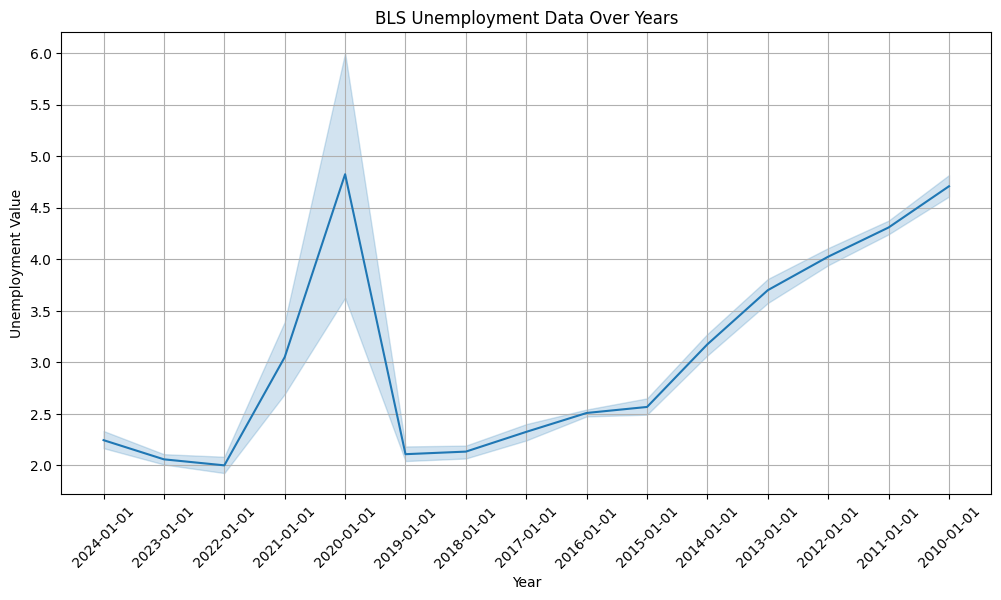

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns
bls_data_cleaned['Year'] = bls_data_cleaned['Year'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(data=bls_data_cleaned, x='Year', y='BLS_Unemployment_Value')
plt.title('BLS Unemployment Data Over Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()



## Line Chart for FRED Unemployment Data
**Description: This plot shows decades-based unemployment data from the Federal Reserve Economic Data (FRED) system. It indicates the way unemployment has changed from year to year.**

**Summary: This graph shows some key indicators of U.S. unemployment from years past. Deep spikes could be times of financial crisis, and steep dips could be times of economic recovery.**

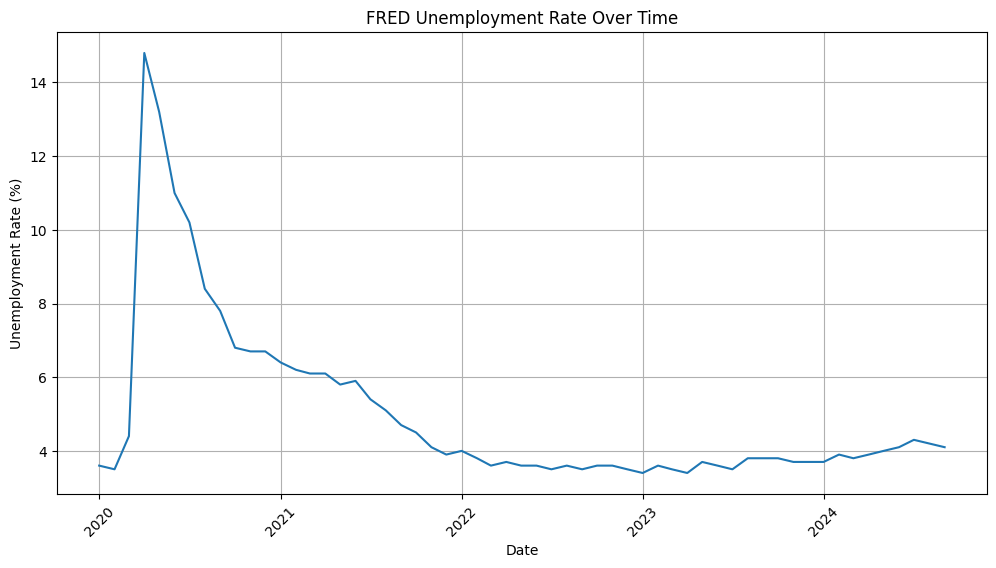

In [8]:
fred_data_cleaned['Date'] = pd.to_datetime(fred_data['Date'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=fred_data, x='Date', y='Unemployment Rate')
plt.title('FRED Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

##  Line Chart for BLS Unemployment Data
**Description: This plot shows decades-based unemployment data from the Bureau of Labor Statistics (BLS). It indicates the way unemployment has changed from year to year.**

**Summary: This graph shows some key indicators of U.S. unemployment from years past. Deep spikes could be times of financial crisis, and steep dips could be times of economic recovery.**

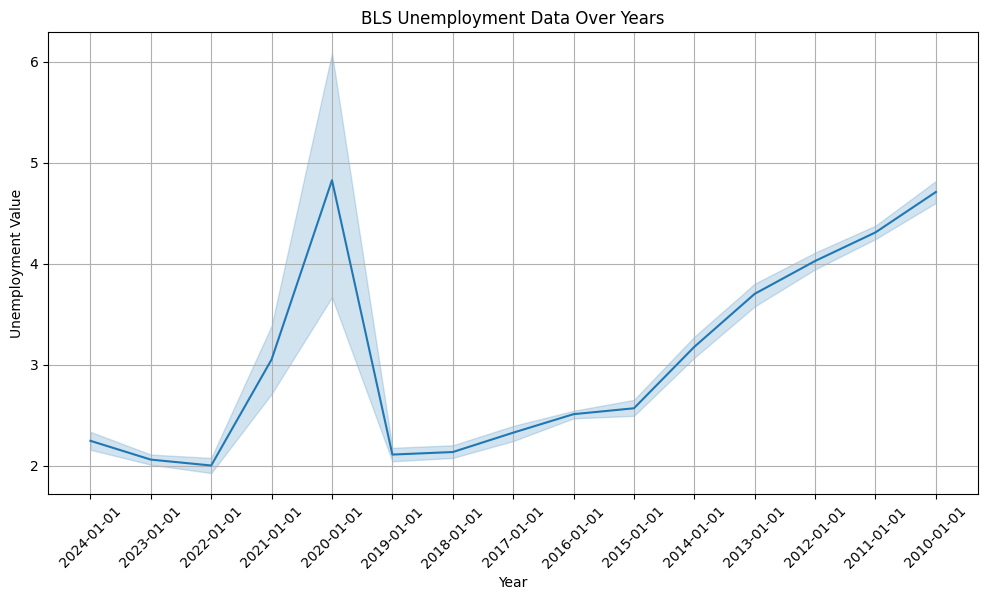

In [9]:
#  Line Chart for BLS Unemployment Data
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year' to a string if necessary
bls_data_cleaned['Year'] = bls_data_cleaned['Year'].astype(str)

# Create a line plot for BLS Unemployment Data
plt.figure(figsize=(12, 6))
sns.lineplot(data=bls_data_cleaned, x='Year', y='BLS_Unemployment_Value')
plt.title('BLS Unemployment Data Over Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()



## Line Chart for FRED Unemployment Data
**Description: This plot shows decades-based unemployment data from the Federal Reserve Economic Data (FRED) system. It indicates the way unemployment has changed from year to year.**

**Summary: This graph shows some key indicators of U.S. unemployment from years past. Deep spikes could be times of financial crisis, and steep dips could be times of economic recovery.**

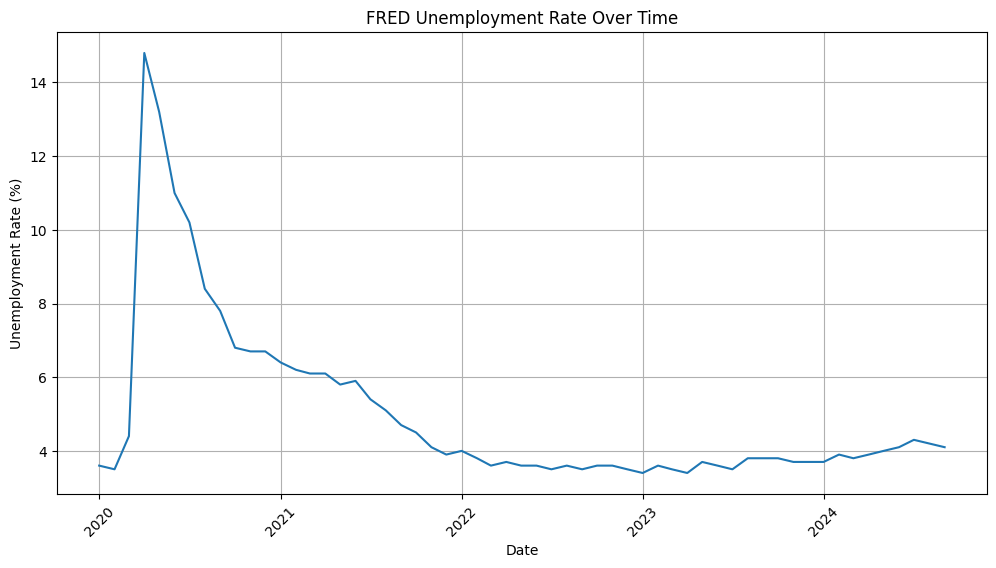

In [10]:
fred_data_cleaned['Date'] = pd.to_datetime(fred_data['Date'])

# Create a line plot for FRED Unemployment Data
plt.figure(figsize=(12, 6))
sns.lineplot(data=fred_data, x='Date', y='Unemployment Rate')
plt.title('FRED Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Line chart for unemployment_analysis with plotly
**Description: This interactive line chart, built with Plotly, shows unemployment rates for different countries over selected years (e.g., 2000, 2005, 2010, 2015, and 2020). It uses a dropdown or legend to allow users to toggle countries on/off, providing interactivity.**

Insights: The interactive feature enhances comparison across countries. You can easily spot which countries faced higher unemployment rates during certain years and identify global or regional trends. For example, global recessions like the 2008 financial crisis may be reflected in multiple countries.

In [11]:
import plotly.express as px

years_of_interest = [2000, 2005, 2010, 2015, 2020]
filtered_data = analysis_data_cleaned[analysis_data_cleaned['Year'].isin(years_of_interest)]

fig = px.line(
    filtered_data,
    x='Year',
    y='Unemployment Rate',
    color='Country Name',  # Color lines by country
    title='Interactive Unemployment Rate by Country Over Selected Years',
    labels={'Unemployment Rate': 'Unemployment Rate (%)', 'Year': 'Year'}
)

fig.update_traces(mode='lines+markers', hovertemplate='%{y}% unemployment in %{x}')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Unemployment Rate (%)',
    hovermode='x unified',
    legend_title_text='Country',
    template='plotly_dark'  # Optional: change to 'plotly' for a lighter theme
)

fig.show()


## More data cleaning and merging Data BLS and FRED
- Converted 'Year' column to datetime for BLS data
- Merged BLS and FRED data on 'Year'

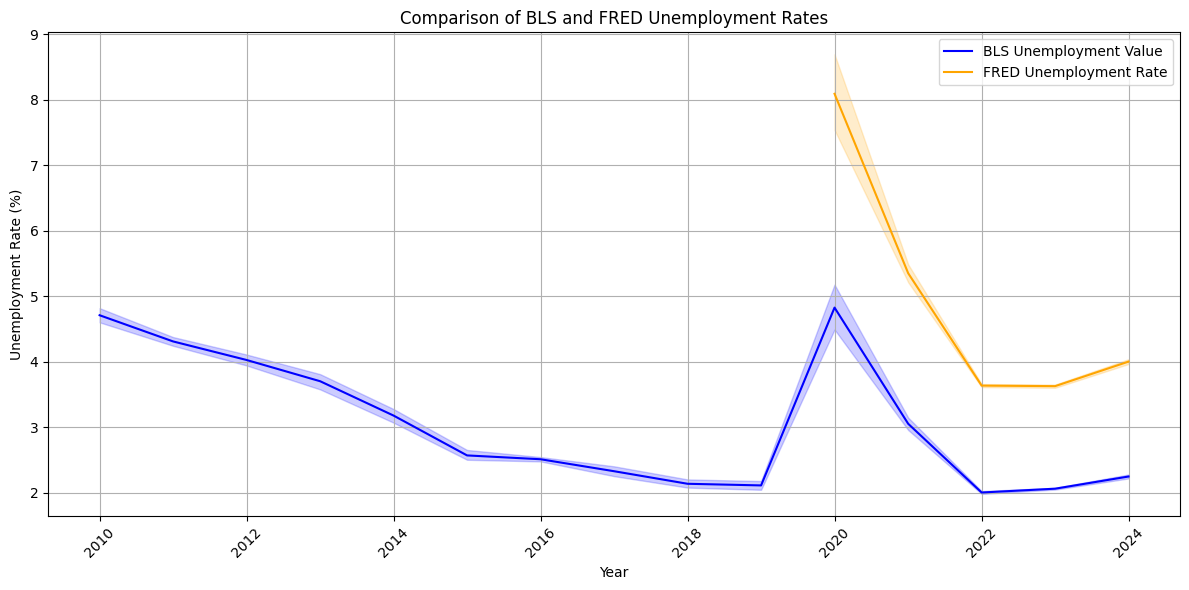

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading datasets
bls_data_path = 'path_to_your_bls_data.csv'  # Update this to your BLS data file path
fred_data_path = 'path_to_your_fred_data.csv'  # Update this to your FRED data file path


# Convert 'Year' column to datetime for BLS data
bls_data_cleaned['Year'] = pd.to_datetime(bls_data_cleaned['Year'])

# Convert 'Year' column in FRED data to datetime
fred_data_cleaned['Year'] = pd.to_datetime(fred_data_cleaned['Year'].astype(str) + '-01-01')

# Merge BLS and FRED data on 'Year'
bls_fred_cleaned = pd.merge(
    bls_data_cleaned[['Year', 'BLS_Unemployment_Value']],
    fred_data_cleaned[['Year', 'Unemployment Rate']],
    on='Year',
    how='outer'
)

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=bls_fred_cleaned, x='Year', y='BLS_Unemployment_Value', label='BLS Unemployment Value', color='blue')
sns.lineplot(data=bls_fred_cleaned, x='Year', y='Unemployment Rate', label='FRED Unemployment Rate', color='orange')

# Adding titles and labels
plt.title('Comparison of BLS and FRED Unemployment Rates')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)  
plt.legend()
plt.grid()
plt.tight_layout()  
plt.show()


## Line chart for unemployment_analysis with plotly
**Description: Interactive Line Chart — created using PlotlyUnemployment Rates for selected Countries from 2000 to 2005, 2010, 2015, 2020. It displays countries by turning them on/off using a dropdown or legend that’s interactive.**

**Insights: Interactive option gives country comparison. It’s easy to spot which countries experienced higher unemployment in some years, and to see global or regional patterns. Global recessions such as the financial crisis of 2008, for instance, can manifest in more than one nation.**

In [13]:
import plotly.express as px

years_of_interest = [2000, 2005, 2010, 2015, 2020]
filtered_data = analysis_data_cleaned[analysis_data_cleaned['Year'].isin(years_of_interest)]

fig = px.line(
    filtered_data,
    x='Year',
    y='Unemployment Rate',
    color='Country Name',  # Color lines by country
    title='Interactive Unemployment Rate by Country Over Selected Years',
    labels={'Unemployment Rate': 'Unemployment Rate (%)', 'Year': 'Year'}
)

fig.update_traces(mode='lines+markers', hovertemplate='%{y}% unemployment in %{x}')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Unemployment Rate (%)',
    hovermode='x unified',
    legend_title_text='Country',
    template='plotly_dark'  # Optional: change to 'plotly' for a lighter theme
)

fig.show()


## More data cleaning and merging Data BLS and FRED
**Description: Unemployment figures from BLS and FRED merged into one chart. It can show both datasets on separate lines or merged view with the same line so you can directly compare them.**

**Insights: This table is useful to spot any potential errors or convergence of BLS/FRED unemployment data. It’s handy for confirming that unemployment data are the same from different sources. And if both the datasets are similar it makes you feel better about the trend’s validity. If they don’t match, then that may be something to probe into reporting and/or data collection gaps.**

In [14]:
bls_fred_cleaned.columns

Index(['Year', 'BLS_Unemployment_Value', 'Unemployment Rate'], dtype='object')

C:\Users\setho\AppData\Local\Temp\ipykernel_6004\1796318885.py:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



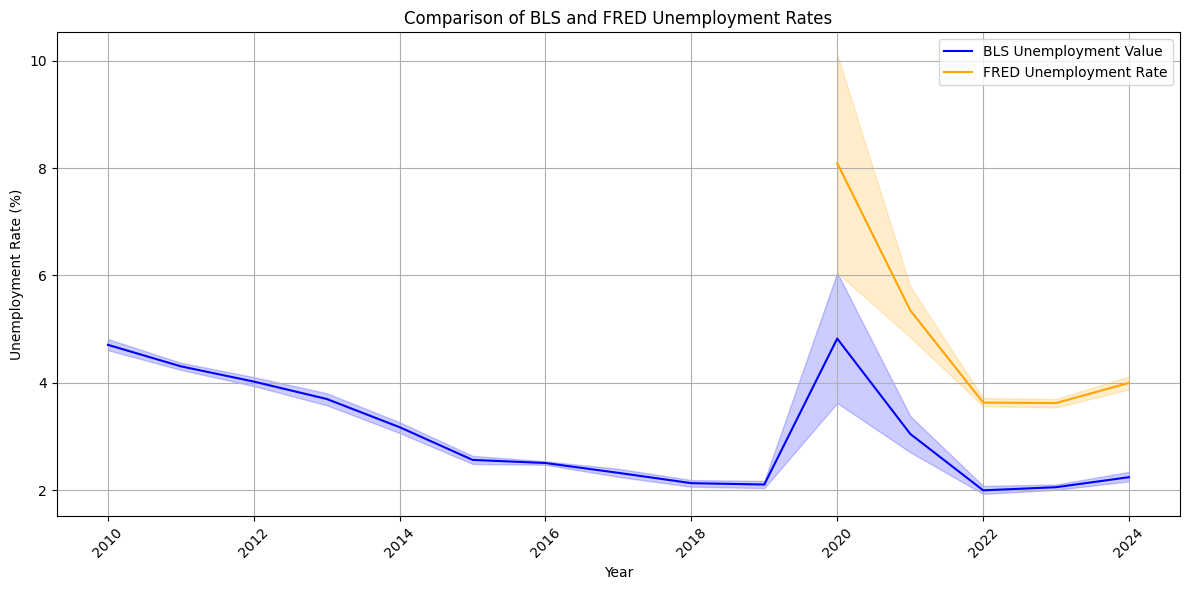

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converted 'Year' column to datetime for BLS data without time zone
bls_data_cleaned['Year'] = pd.to_datetime(bls_data_cleaned['Year']).dt.tz_localize(None)

# Converted 'Year' column in FRED data to datetime without time zone
fred_data_cleaned['Year'] = pd.to_datetime(fred_data_cleaned['Year'].astype(str) + '-01-01').dt.tz_localize(None)

# Merged BLS and FRED data on 'Year'
bls_fred_cleaned = pd.merge(
    bls_data_cleaned[['Year', 'BLS_Unemployment_Value']],
    fred_data_cleaned[['Year', 'Unemployment Rate']],
    on='Year',
    how='outer'
)

# Ploting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=bls_fred_cleaned, x='Year', y='BLS_Unemployment_Value', label='BLS Unemployment Value', color='blue')
sns.lineplot(data=bls_fred_cleaned, x='Year', y='Unemployment Rate', label='FRED Unemployment Rate', color='orange')

# Adding titles and labels
plt.title('Comparison of BLS and FRED Unemployment Rates')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)  
plt.legend()
plt.grid()
plt.tight_layout()  
plt.show()


## Machine learning
For this project I could try various machine learning methods like supervised learning methods. I might use regression to predict unemployment, for example, on the basis of some critieria such as economic metrics or demographic information. Classification Algorithms could also be applicable if I am looking to sort data according to regions of high, medium, or low unemployment.

But there are a couple of problems here. One is the quality and completeness of the data. Data that’s missing or not reflected can bias or make your model fail. Also, if the dataset is disproportionately large (e.g., more data points are in some years/locations) this can affect classification accuracy.

Features and engineering are a second possibility. It is very important for performance to decide which features to map on to the model and how to model them. And there are also sometimes complex relationships in the data that need more complex models or preprocessing.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [1]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 16548 bytes to source.py
